In [8]:
%cd /media/Shared/Autonomous-Navigation-Offroad-by-traversability-analysis/src

/media/Shared/Autonomous-Navigation-Offroad-by-traversability-analysis/src


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pointcloud import RansacSegmentation
from obstacle_detection.normals import normals_from_pointcloud
from obstacle_detection.pointcloud import depthimage_to_pointcloud, depth_to_pointcloud, visualise_pointcloud, visualise_pointcloud_plotly
from params.robot import K

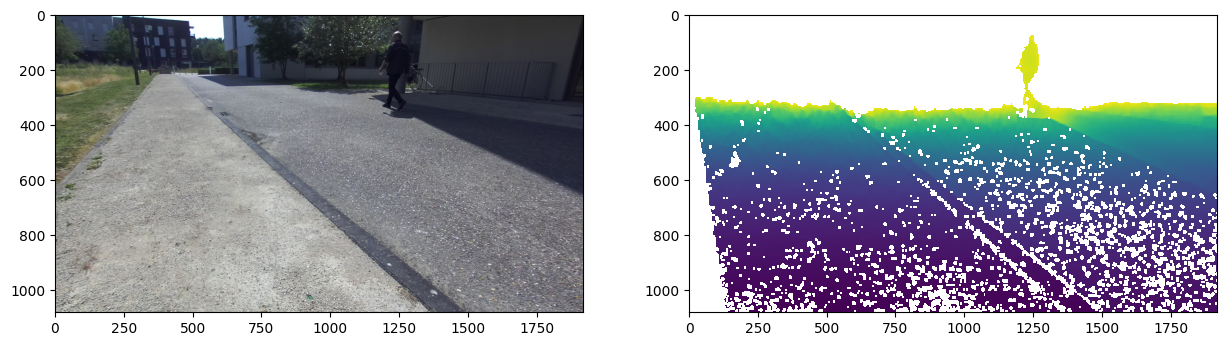

In [10]:
DEPTH_RANGE = [0.7, 7]

# id = np.random.randint(1, 10)
id = 6
dir = "../bagfiles/images_extracted/"
img, depth, norm = (Image.open(dir+f"{id}.png"), Image.open(dir+f"{id}d.png"), Image.open(dir+f"{id}n.png"))
img, depth, norm = np.array(img)/255, np.array(depth)/255, np.array(norm)/255

# Mask everything by valid depth
depth_mask = np.where(depth>0, 1, -1)

depth = np.where(depth_mask>0, DEPTH_RANGE[0]+(depth*(DEPTH_RANGE[1]-DEPTH_RANGE[0])), np.nan)


fig, (a1, a2) = plt.subplots(1, 2, figsize = (15, 45))
# plt.axis("off")
a1.imshow(img)
a2.imshow(depth)
plt.show()

In [11]:
pc = depth_to_pointcloud(depth, K)

pc.shape

(1080, 1920, 3)

In [12]:
pc = pc[~np.isnan(depth)]
idx = np.random.randint(pc.shape[0], size = 10000)
pc_ = pc[idx, :]
seg = RansacSegmentation(pc_)
plane_points = seg.fit(pc, 100)
pts = np.array(plane_points)

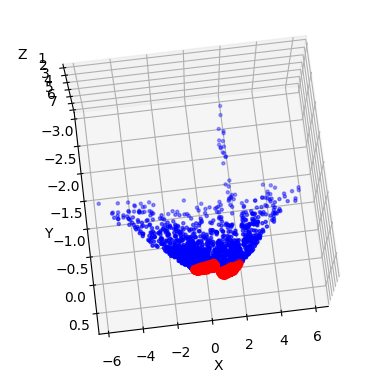

In [13]:
idx = np.random.choice(pc.shape[0], pts.shape[0], False)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=pc[idx][:, 0], ys=pc[idx][:, 1], zs=pc[idx][:, 2], color='blue', marker=".")
ax.scatter(xs=pts[:, 0], ys=pts[:, 1], zs=pts[:, 2], color='red', marker="o")


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(-103,-83)

plt.show()

(1233002, 3) (3, 1)
0.985595238885699 0.0
(1233002,)
[ 0.03119205 -0.94990104 -0.31099047]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


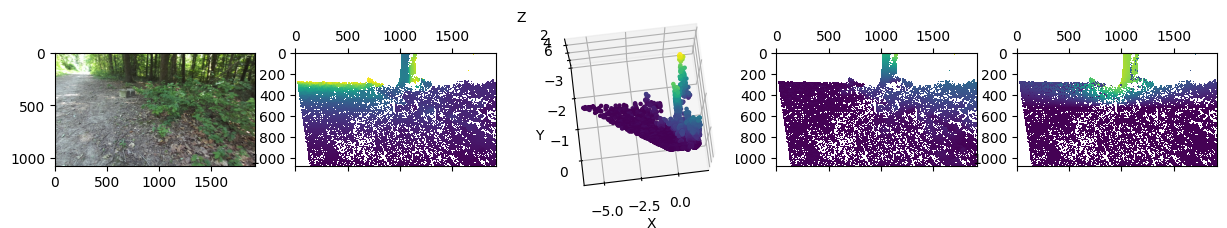

(1492561, 3) (3, 1)
0.9988815602179758 0.0
(1492561,)
[ 0.00912878 -0.96762012 -0.25224586]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


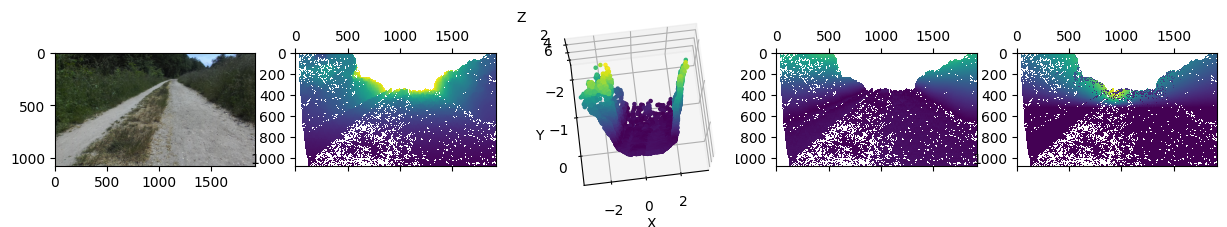

(1551498, 3) (3, 1)
0.9993000498786975 0.0
(1551498,)
[ 0.05104685 -0.95597886 -0.28896132]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


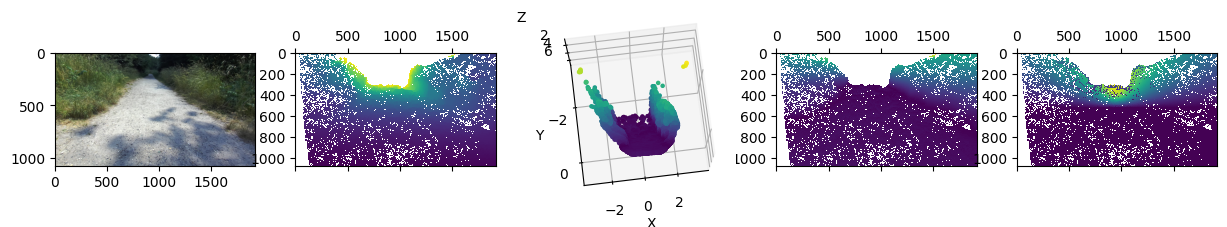

(1265064, 3) (3, 1)
0.9967756788619369 0.0
(1265064,)
[ 0.13953065 -0.90583213 -0.39999918]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


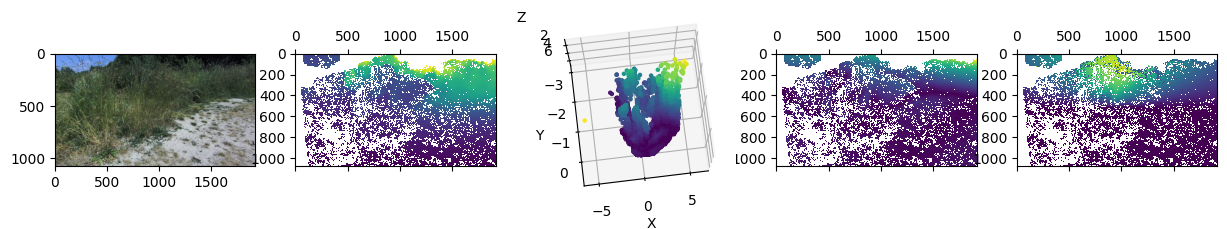

(412160, 3) (3, 1)
0.9387806418929785 0.0
(412160,)
[-0.01186488 -0.91881736 -0.39450461]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


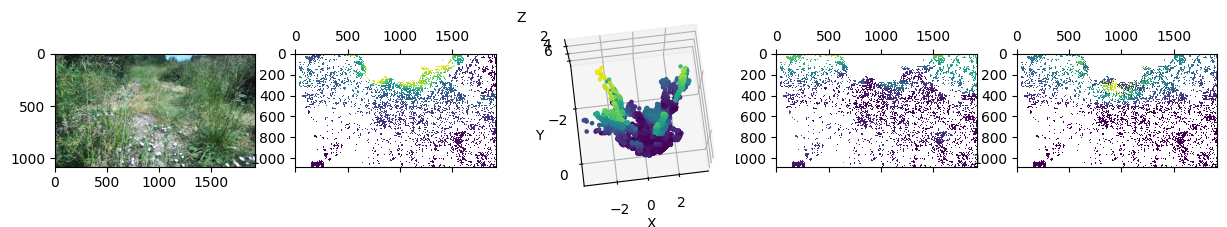

(1343604, 3) (3, 1)
0.9882136654726458 0.0
(1343604,)
[ 0.07900127 -0.9693944  -0.23245065]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


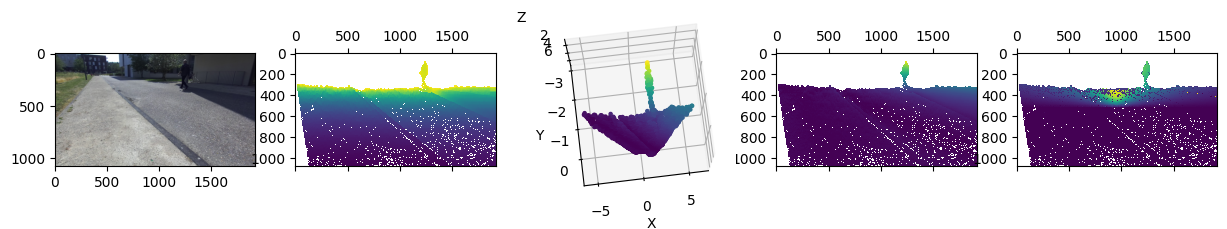

(1451994, 3) (3, 1)
0.9976130012899589 0.0
(1451994,)
[-0.01348184 -0.95304714 -0.30252171]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


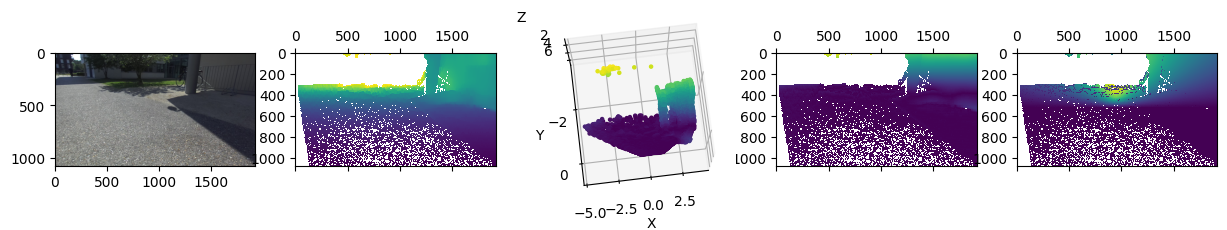

(1334330, 3) (3, 1)
0.9993629015711238 0.0
(1334330,)
[ 0.05243051 -0.95871885 -0.27948023]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


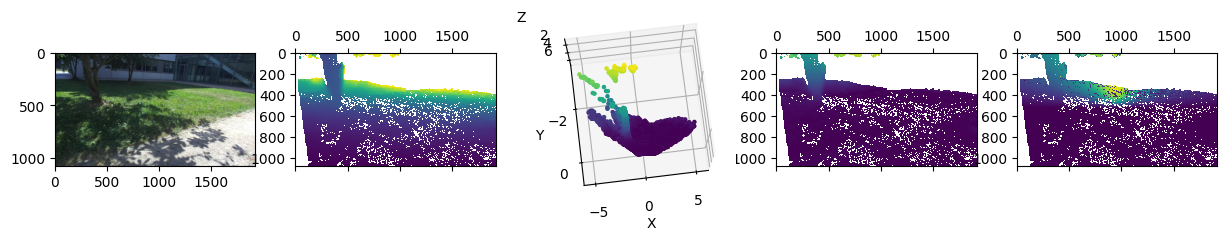

(1242516, 3) (3, 1)
0.9961992790128364 0.0
(1242516,)
[ 0.04353992 -0.95855278 -0.28156854]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


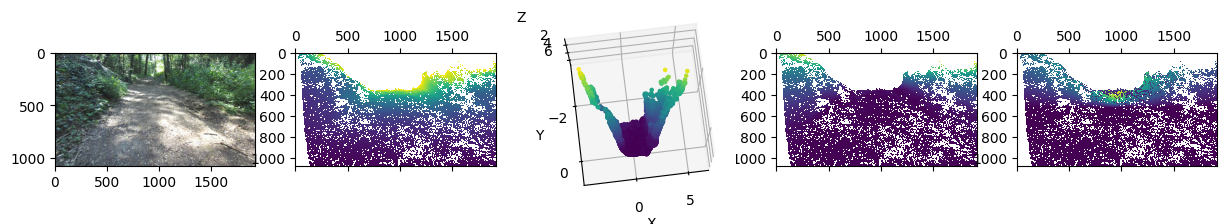

(1646479, 3) (3, 1)
0.9988619306118101 0.0
(1646479,)
[-0.03174718 -0.95395942 -0.2982508 ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


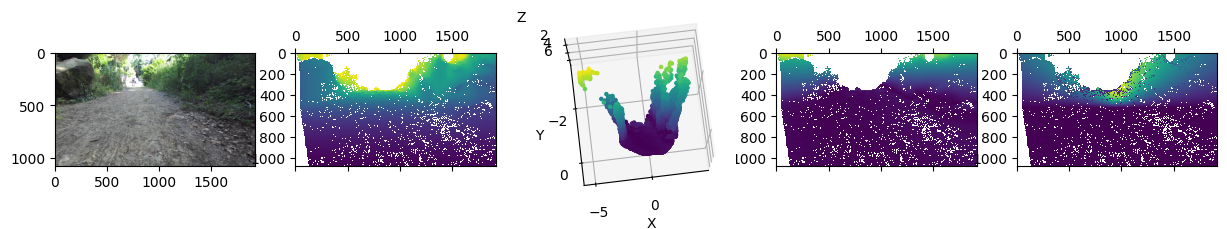

(1527345, 3) (3, 1)
0.9935079263802366 0.0
(1527345,)
[-0.09441906 -0.95817841 -0.27014659]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


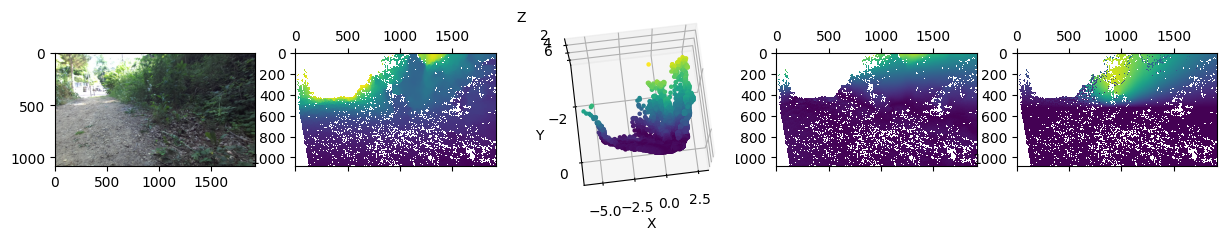

(1422703, 3) (3, 1)
0.9454362818150405 0.0
(1422703,)
[ 0.00529753 -0.95590113 -0.29364089]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


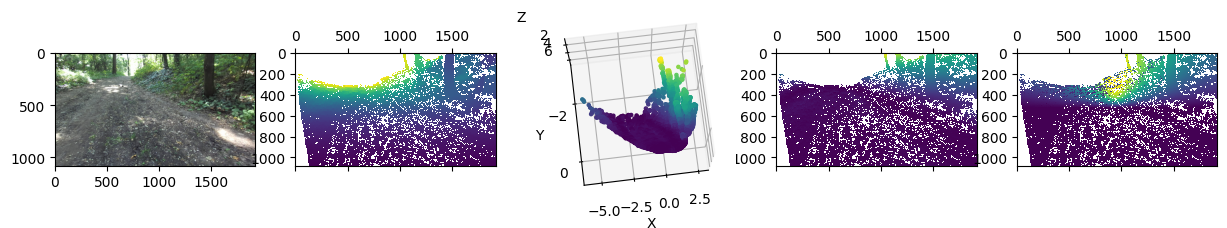

(936822, 3) (3, 1)
0.9828405764706708 0.0
(936822,)
[ 0.02699708 -0.95540984 -0.29404624]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


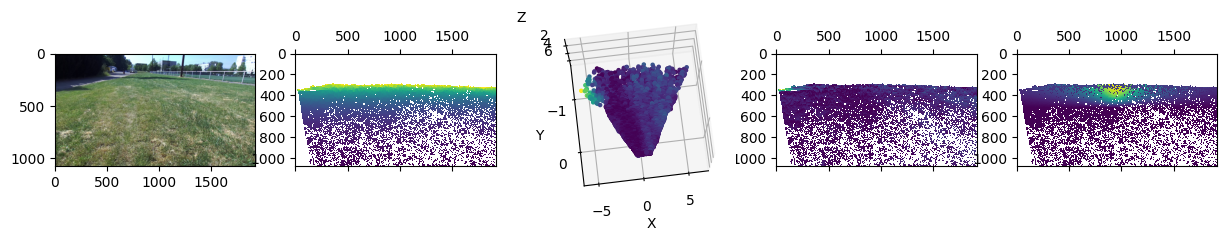

(1415147, 3) (3, 1)
0.9979048270664777 0.0
(1415147,)
[ 0.00693539 -0.95858895 -0.28470885]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


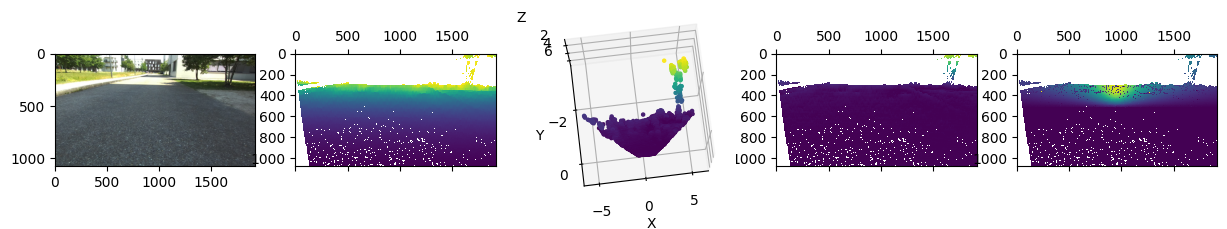

(1757577, 3) (3, 1)
0.9963143509843451 0.0
(1757577,)
[ 2.85949937e-04 -9.27581226e-01 -3.73621450e-01]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


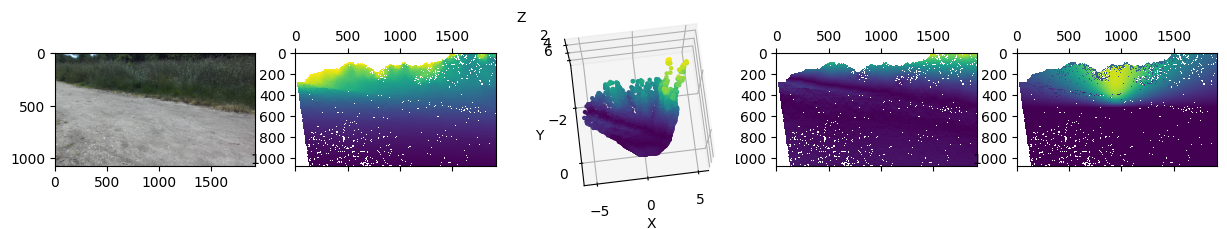

In [18]:
for id in range(1,16):
    dir = "../bagfiles/images_extracted/"
    img, depth, norm = (Image.open(dir+f"{id}.png"), Image.open(dir+f"{id}d.png"), Image.open(dir+f"{id}n.png"))
    img, depth, norm = np.array(img)/255, np.array(depth)/255, np.array(norm)/255

    # Mask everything by valid depth
    depth_mask = np.where(depth>0, 1, -1)

    depth = np.where(depth_mask>0, DEPTH_RANGE[0]+(depth*(DEPTH_RANGE[1]-DEPTH_RANGE[0])), np.nan)


    fig, (a1, a2, ax, a4, a5) = plt.subplots(1, 5, figsize = (15, 60))
    # plt.axis("off")
    a1.imshow(img)
    a2.matshow(depth)

    pc = depth_to_pointcloud(depth, K)

    pc = pc[~np.isnan(depth)]
    idx = np.random.randint(pc.shape[0], size = 10000)
    pc_ = pc[idx, :]
    seg = RansacSegmentation(pc_, ref_normal=[0, -1, 0], stopping_limit = 0.7)
    plane_points = seg.fit(pc, 100)
    pts = np.array(plane_points)

    ref_normal = np.array([0, -1, 0])[:, np.newaxis]
    normals = normals_from_pointcloud(pc, mode="sphere_fit")

    print(normals.shape, ref_normal.shape)

    inclination_cost = np.nan*np.ones_like(depth)
    inccosts = np.array([ max(x, 0) for x in (- normals @ ref_normal).squeeze()])
    print(np.max(inccosts), np.min(inccosts))
    print(inccosts.shape)
    inclination_cost[~np.isnan(depth)] =  inccosts # dot product of unit vecs

    elevation_cost = np.nan*np.ones_like(depth)
    elevation_cost[~np.isnan(depth)] = seg.distance(pc)

    idx = np.random.choice(pc.shape[0], pts.shape[0], False)
    cs = seg.distance(pc[idx])
    # fig = plt.figure()
    ax.remove()
    ax = fig.add_subplot(1, 5, 3, projection='3d')

    print(seg.normal)

    ax.scatter(xs=pc[idx][:, 0], ys=pc[idx][:, 1], zs=pc[idx][:, 2], c=cs, marker=".", alpha = 1,  cmap=plt.cm.viridis)
    # ax.scatter(xs=pts[:, 0], ys=pts[:, 1], zs=pts[:, 2], color='red', marker="o", alpha = 0.4)
    # plt.colorbar(cax=plt.cm.coolwarm)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.view_init(-103,-83)

    a4.matshow(elevation_cost)
    a5.matshow(inclination_cost)
    plt.savefig(f"obstacle_detection/results/{id}_pcseg.png", format="png")
    plt.savefig(f"obstacle_detection/results/{id}_pcseg.eps", format="eps")
    
    plt.show()

    # plt.show()

In [ ]:
# NORMALS
from obstacle_detection.normals import cost_from_normals, cosine_similarity


THRESH = 50
ref = seg.normal
COS_THRESH = np.cos(THRESH*np.pi/180)
print(COS_THRESH)
sim = cosine_similarity(norm, ref = ref)
plt.matshow(np.where(np.isnan(depth), np.nan, sim))
plt.colorbar()
plt.show()
cost_ = np.where(sim>0.4, 0, 1)
# cost_ = 1 - sim
plt.matshow(np.where(np.isnan(depth), np.nan, cost_))
plt.colorbar()
plt.show()
cost = cost_from_normals(norm, ref,thresh=COS_THRESH)
plt.matshow(np.where(np.isnan(depth), np.nan, cost))
plt.colorbar()
plt.show()